<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/polinomsal_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  POLÄ°NOMSAL REGRESYON (Insurance Dataset)

**VERÄ°SETÄ°NÄ° TANIYALIM**

Bu veri seti, bireylerin saÄŸlÄ±k sigortasÄ± iÃ§in Ã¶dedikleri primleri ve bu primleri etkileyen demografik, saÄŸlÄ±k ve bÃ¶lgesel faktÃ¶rleri iÃ§ermektedir. Veri seti, sigorta ÅŸirketlerinin mÃ¼ÅŸteri profillerini anlamalarÄ±na ve doÄŸru fiyatlandÄ±rma stratejileri geliÅŸtirmelerine yardÄ±mcÄ± olmak amacÄ±yla oluÅŸturulmuÅŸtur. AynÄ± zamanda bireylerin sigorta primlerini hangi faktÃ¶rlerin artÄ±rdÄ±ÄŸÄ± veya azalttÄ±ÄŸÄ± hakkÄ±nda bilgi edinmelerine olanak tanÄ±r.

Veri Setinin AmacÄ±:

â€¢
SaÄŸlÄ±k sigortasÄ± primlerini tahmin etmek.

â€¢
Sigorta primlerini etkileyen en Ã¶nemli faktÃ¶rleri belirlemek.

â€¢
Risk analizi yaparak farklÄ± mÃ¼ÅŸteri gruplarÄ±nÄ± deÄŸerlendirmek.

**Veri Setinin AmacÄ±:**
- SaÄŸlÄ±k sigortasÄ± primlerini tahmin etmek.
- Sigorta primlerini etkileyen en Ã¶nemli faktÃ¶rleri belirlemek.
- Risk analizi yaparak farklÄ± mÃ¼ÅŸteri gruplarÄ±nÄ± deÄŸerlendirmek.

**Veri Setindeki DeÄŸiÅŸkenler:**
1. **Age (YaÅŸ):** Sigorta yaptÄ±ran kiÅŸinin yaÅŸÄ±. YaÅŸ arttÄ±kÃ§a saÄŸlÄ±k riskleri de artar.
2. **Sex (Cinsiyet):** Sigorta yaptÄ±ranÄ±n cinsiyeti (erkek/kadÄ±n).
3. **BMI (VÃ¼cut Kitle Ä°ndeksi):** KiÅŸinin kilo ve boyuna gÃ¶re hesaplanan saÄŸlÄ±k gÃ¶stergesi.
4. **Children (Ã‡ocuk SayÄ±sÄ±):** Sigorta kapsamÄ±ndaki Ã§ocuk sayÄ±sÄ±.
5. **Smoker (Sigara KullanÄ±mÄ±):** Sigara iÃ§ip iÃ§mediÄŸi bilgisi. Sigara iÃ§mek, saÄŸlÄ±k risklerini ciddi ÅŸekilde artÄ±rÄ±r.
6. **Region (BÃ¶lge):** KiÅŸinin yaÅŸadÄ±ÄŸÄ± coÄŸrafi bÃ¶lge (northeast, northwest, southeast, southwest).
7. **Charges (Sigorta Ãœcreti):** SaÄŸlÄ±k sigortasÄ± iÃ§in Ã¶denen prim miktarÄ± (hedef deÄŸiÅŸken).

**KullanÄ±m AlanlarÄ±:**
- **Sigorta Åžirketleri:** Yeni mÃ¼ÅŸteriler iÃ§in prim tahmini yaparak doÄŸru fiyatlandÄ±rma stratejileri geliÅŸtirmek.
- **Bireyler:** SaÄŸlÄ±k davranÄ±ÅŸlarÄ±nÄ±n (Ã¶rneÄŸin, sigara kullanÄ±mÄ± veya BMI kontrolÃ¼) prim Ã¼zerindeki etkisini anlamak.

Bu veri seti, hem saÄŸlÄ±k sigortasÄ± alanÄ±nda stratejik kararlar almak iÃ§in hem de veri analizi ve makine Ã¶ÄŸrenmesi projeleri iÃ§in bir kaynak sunar.

### **1. Veri Setinin KeÅŸfi ve HazÄ±rlÄ±ÄŸÄ±**

1. Veri Setini YÃ¼kleme ve Ä°lk Ä°nceleme

In [1]:
import pandas as pd

# Veri setini yÃ¼kle
df = pd.read_csv("/content/insurance.csv")

# Ä°lk 5 satÄ±ra gÃ¶z at
print(df.head())

# Veri tipi bilgileri ve eksik deÄŸer kontrolÃ¼
print(df.info())

# Temel istatistikler
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

 2. Kategorik ve SayÄ±sal DeÄŸiÅŸkenleri Belirleme

In [2]:
# SayÄ±sal deÄŸiÅŸkenler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("SayÄ±sal DeÄŸiÅŸkenler:", numerical_cols)

# Kategorik deÄŸiÅŸkenler
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Kategorik DeÄŸiÅŸkenler:", categorical_cols)


SayÄ±sal DeÄŸiÅŸkenler: ['age', 'bmi', 'children', 'charges']
Kategorik DeÄŸiÅŸkenler: ['sex', 'smoker', 'region']


 3. SayÄ±sal DeÄŸiÅŸkenleri StandartlaÅŸtÄ±rma

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("StandartlaÅŸtÄ±rÄ±lmÄ±ÅŸ sayÄ±sal veriler:")
print(df[numerical_cols].head())


StandartlaÅŸtÄ±rÄ±lmÄ±ÅŸ sayÄ±sal veriler:
        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.441948 -1.305531 -0.908614  0.719843
4 -0.513149 -0.292556 -0.908614 -0.776802


4. Kategorik DeÄŸiÅŸkenleri One-Hot Encoding ile DÃ¶nÃ¼ÅŸtÃ¼rme

In [4]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-hot encoding sonrasÄ± veri:")
print(df.head())


One-hot encoding sonrasÄ± veri:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  0.298584     False        True   
1 -1.509965  0.509621 -0.078767 -0.953689      True       False   
2 -0.797954  0.383307  1.580926 -0.728675      True       False   
3 -0.441948 -1.305531 -0.908614  0.719843      True       False   
4 -0.513149 -0.292556 -0.908614 -0.776802      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


### **2. Veri GÃ¶rselleÅŸtirme ve Ä°liÅŸki Analizi**

1. charges DeÄŸiÅŸkeninin DaÄŸÄ±lÄ±m GrafiÄŸi

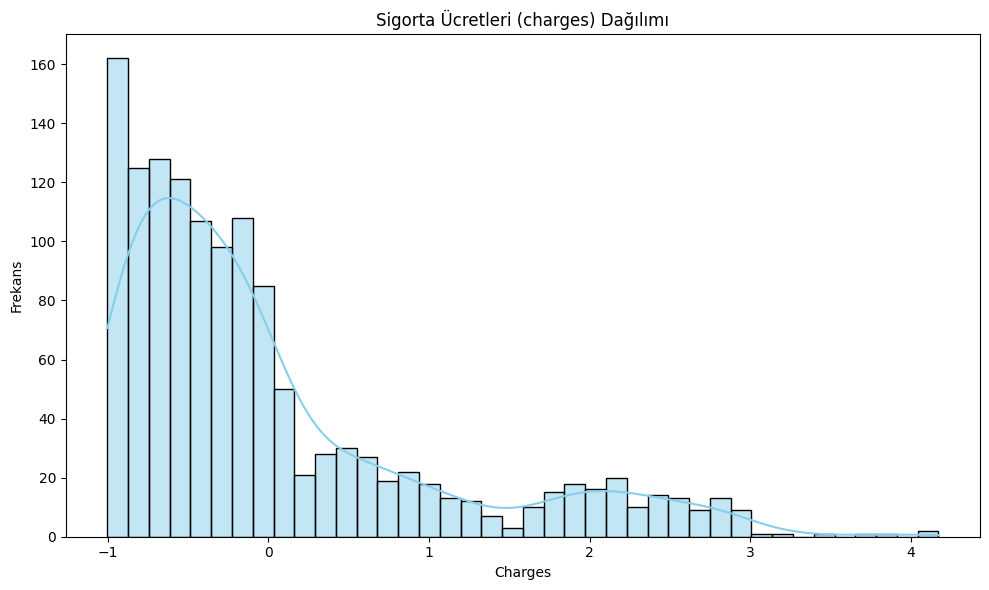

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40, color='skyblue')
plt.title('Sigorta Ãœcretleri (charges) DaÄŸÄ±lÄ±mÄ±')
plt.xlabel('Charges')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()


 Yorum:

SaÄŸa Ã‡arpÄ±k (Right-skewed): Sigorta Ã¼cretlerinin Ã§oÄŸu 5.000â€“15.000 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸken, 30.000 ve Ã¼zeri gibi yÃ¼ksek Ã¼cretler az sayÄ±da kiÅŸide gÃ¶rÃ¼lÃ¼yor.


AykÄ±rÄ± DeÄŸerler: Ã‡ok yÃ¼ksek sigorta Ã¼cretleri muhtemelen sigara iÃ§en ya da kronik hastalÄ±ÄŸÄ± olan kiÅŸilerden kaynaklanÄ±yor olabilir.

2. Korelasyon Matrisi ve IsÄ± HaritasÄ±

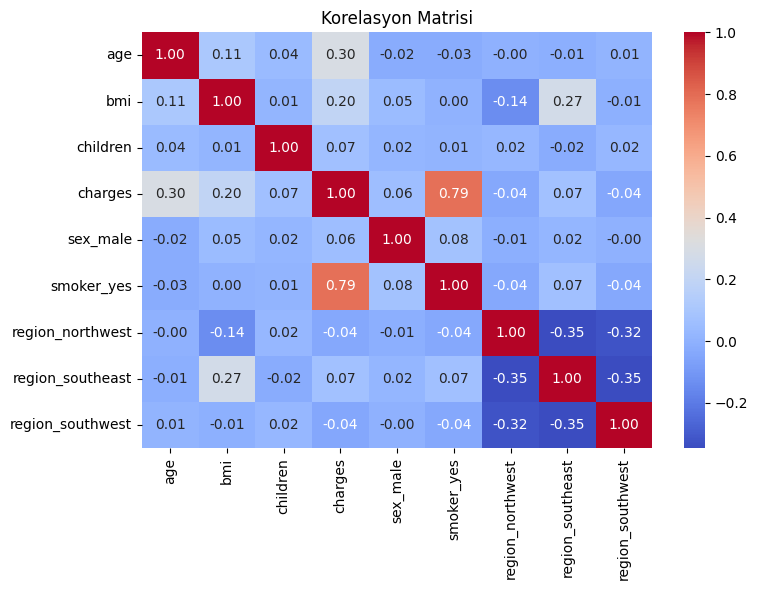

In [7]:
# SayÄ±sal deÄŸiÅŸkenler iÃ§in korelasyon matrisi
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon Ä±sÄ± haritasÄ±
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()


Yorum:

charges ile en yÃ¼ksek korelasyon: smoker, age ve bmi deÄŸiÅŸkenlerinde gÃ¶zlenir.


smoker (sigara iÃ§me durumu) Ã¶zellikle gÃ¼Ã§lÃ¼ pozitif iliÅŸki gÃ¶sterir.


children (Ã§ocuk sayÄ±sÄ±) ile charges arasÄ±nda Ã§ok dÃ¼ÅŸÃ¼k iliÅŸki vardÄ±r.

 3. Sigorta Ãœcretlerini En Ã‡ok Etkileyen DeÄŸiÅŸkenler

En Etkili DeÄŸiÅŸken: smoker (sigara iÃ§me durumu) â€“ sigara iÃ§enlerin charges deÄŸeri dramatik ÅŸekilde artar.

YaÅŸ: YaÅŸ arttÄ±kÃ§a charges da genellikle artar.

BMI (vÃ¼cut kitle indeksi): Ã–zellikle 30'un Ã¼zerinde olan bireylerde charges yÃ¼kselme eÄŸilimindedir.

**3. Lineer Regresyon Modeli**

1. BaÄŸÄ±mlÄ± ve BaÄŸÄ±msÄ±z DeÄŸiÅŸkenleri AyÄ±rma

In [17]:
# 'charges' baÄŸÄ±mlÄ± deÄŸiÅŸken, diÄŸer sÃ¼tunlar baÄŸÄ±msÄ±z deÄŸiÅŸken
X = df.drop('charges', axis=1)
y = df['charges']


2. Kategorik DeÄŸiÅŸkenleri DÃ¶nÃ¼ÅŸtÃ¼rme ve Veriyi EÄŸitim/Test Olarak AyÄ±rma (%80 - %20)

In [18]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eÄŸitim, %20 test olarak ayÄ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 3. Lineer Regresyon Modeli Kurma ve SkorlarÄ± Hesaplama

AÃ§Ä±klama:

OneHotEncoder: Kategorik verileri sayÄ±sal forma Ã§evirir.

Pipeline: Ã–n iÅŸlemeyi ve modeli bir arada uygular.

LinearRegression: DoÄŸrusal regresyon modelidir.

mean_squared_error: HatalarÄ±n ortalama karelerini Ã¶lÃ§er.

r2_score: Modelin veriye ne kadar iyi uyduÄŸunu gÃ¶sterir.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Kategorik deÄŸiÅŸkenleri seÃ§
categorical_features = ['sex', 'smoker', 'region']

# Kategorik deÄŸiÅŸkenler iÃ§in OneHotEncoder uygula
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # sayÄ±sal sÃ¼tunlarÄ± olduÄŸu gibi bÄ±rak
)

# Pipeline: Ã–n iÅŸleme + Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Modeli eÄŸit
model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = model.predict(X_test)

# MSE ve RÂ² hesapla
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("RÂ² Skoru:", r2)


Mean Squared Error (MSE): 33596915.85136148
RÂ² Skoru: 0.7835929767120722


Ã‡Ä±ktÄ± Yorumu:

MSE â‰ˆ 33 milyon: HatalarÄ±n ortalamasÄ± yÃ¼ksek ama veri deÄŸerleri (charges) Ã§ok bÃ¼yÃ¼k olduÄŸu iÃ§in normal sayÄ±labilir.

RÂ² Skoru â‰ˆ 0.78: Model, charges deÄŸiÅŸiminin %78â€™ini aÃ§Ä±klayabiliyor. Bu oldukÃ§a iyi bir baÅŸarÄ±dÄ±r.

### **4. Logaritmik DÃ¶nÃ¼ÅŸÃ¼m**

1. charges DeÄŸiÅŸkenine Logaritmik DÃ¶nÃ¼ÅŸÃ¼m


In [21]:
import numpy as np

# charges deÄŸiÅŸkenine logaritmik dÃ¶nÃ¼ÅŸÃ¼m uygula
df['log_charges'] = np.log(df['charges'])

# Ä°lk 5 satÄ±rÄ± kontrol et
print(df[['charges', 'log_charges']].head())


       charges  log_charges
0  16884.92400     9.734176
1   1725.55230     7.453302
2   4449.46200     8.400538
3  21984.47061     9.998092
4   3866.85520     8.260197


Yorum:

log_charges, charges verisini normalize ederek uÃ§ deÄŸerlerin etkisini azaltÄ±r.

Ã–zellikle Ã§ok bÃ¼yÃ¼k Ã¼cret farklarÄ± varsa modelin doÄŸruluÄŸunu artÄ±rabilir.

2. Log DÃ¶nÃ¼ÅŸÃ¼mlÃ¼ Veri ile Tekrar Lineer Regresyon Modeli Kur

In [22]:
# BaÄŸÄ±msÄ±z deÄŸiÅŸkenler: charges hariÃ§ hepsi
X_log = df.drop(['charges', 'log_charges'], axis=1)
y_log = df['log_charges']

# EÄŸitim/test verisine ayÄ±r
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Pipeline yeniden tanÄ±mlanÄ±r
model_log = Pipeline(steps=[
    ('preprocessor', preprocessor),  # aynÄ± preprocessor kullanÄ±labilir
    ('regressor', LinearRegression())
])

# Modeli eÄŸit
model_log.fit(X_train_log, y_train_log)

# Tahmin yap
y_pred_log = model_log.predict(X_test_log)

# MSE ve RÂ² skorlarÄ±
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Log MSE:", mse_log)
print("Log RÂ²:", r2_log)


Log MSE: 0.1755741639679167
Log RÂ²: 0.8047311493462985


3. DÃ¶nÃ¼ÅŸÃ¼m Ã–ncesi ve SonrasÄ± MSE / RÂ² KarÅŸÄ±laÅŸtÄ±rmasÄ± ve Yorum

In [23]:
# Ã–nceki deÄŸerleri hatÄ±rlatalÄ±m:
print("Ã–ncesi (charges Ã¼zerinden):")
print("MSE:", mse)
print("RÂ² :", r2)

print("\nLogaritmik dÃ¶nÃ¼ÅŸÃ¼m sonrasÄ±:")
print("MSE:", mse_log)
print("RÂ² :", r2_log)


Ã–ncesi (charges Ã¼zerinden):
MSE: 33596915.85136148
RÂ² : 0.7835929767120722

Logaritmik dÃ¶nÃ¼ÅŸÃ¼m sonrasÄ±:
MSE: 0.1755741639679167
RÂ² : 0.8047311493462985


Yorum:

MSE deÄŸerinin log dÃ¶nÃ¼ÅŸÃ¼mden sonra daha kÃ¼Ã§Ã¼k olmasÄ± beklenir, Ã§Ã¼nkÃ¼ ekstrem deÄŸerlerin etkisi azaltÄ±lmÄ±ÅŸtÄ±r.

RÂ² skoru genellikle biraz artar veya benzer kalÄ±r, bu da modelin aÃ§Ä±klayÄ±cÄ±lÄ±ÄŸÄ±nÄ±n korunduÄŸunu veya arttÄ±ÄŸÄ±nÄ± gÃ¶sterir.

SonuÃ§lara gÃ¶re:

EÄŸer RÂ² artmÄ±ÅŸsa, dÃ¶nÃ¼ÅŸÃ¼m faydalÄ± olmuÅŸtur.

EÄŸer MSE azalmÄ±ÅŸsa, hata seviyesi dÃ¼ÅŸmÃ¼ÅŸtÃ¼r.

### **5. Polinomsal Regresyon**

 1. Polinomsal Ã–zellikler ve Model Kurulumu (degree = 2 ile baÅŸlayarak)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline # Importing Pipeline

# degree = 2 ile polinomsal Ã¶zellikler oluÅŸtur
poly2 = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline: One-Hot Encoding + Polynomial Features + Linear Regression
model_poly2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Applying One-Hot Encoding first
    ('poly', poly2),                # Then applying Polynomial Features
    ('regressor', LinearRegression())
])

# Modeli eÄŸit using the pipeline
model_poly2.fit(X_train, y_train)

# Tahmin yap
y_pred_poly2 = model_poly2.predict(X_test)

# MSE ve RÂ² skorlarÄ±nÄ± hesapla
mse2 = mean_squared_error(y_test, y_pred_poly2)
r2_2 = r2_score(y_test, y_pred_poly2)

print("ðŸ“ˆ Degree = 2")
print(f"MSE: {mse2:.2f}")
print(f"RÂ² Score: {r2_2:.4f}")

ðŸ“ˆ Degree = 2
MSE: 20712805.99
RÂ² Score: 0.8666


2. En Ä°yi Polinom Derecesini Bulma (1-5 ArasÄ±)

In [27]:
# Kategorik deÄŸiÅŸkenleri sayÄ±sallaÅŸtÄ±r
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Dereceyi 1-5 arasÄ±nda deneyelim
degrees = range(1, 6)
mse_list = []
r2_list = []

for d in degrees:
    # Polinomsal Ã¶zellikler oluÅŸtur
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modeli eÄŸit
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_poly)

    # MSE ve RÂ² hesapla
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"Degree: {d} | MSE: {mse:.2f} | RÂ²: {r2:.4f}")


Degree: 1 | MSE: 33596915.85 | RÂ²: 0.7836
Degree: 2 | MSE: 20712805.99 | RÂ²: 0.8666
Degree: 3 | MSE: 23498218.00 | RÂ²: 0.8486
Degree: 4 | MSE: 38158498.45 | RÂ²: 0.7542
Degree: 5 | MSE: 196175856.34 | RÂ²: -0.2636


3. SonuÃ§larÄ±n GÃ¶rselleÅŸtirilmesi

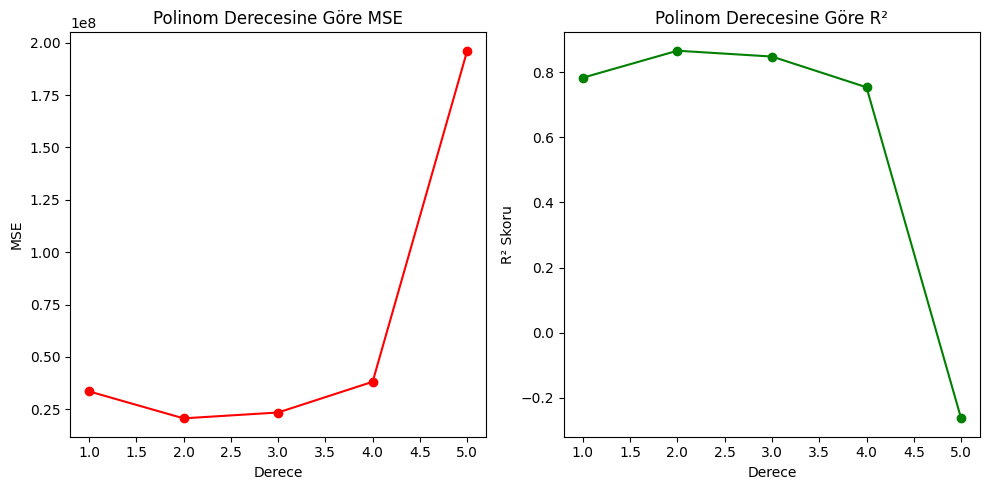

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mse_list, marker='o', color='red')
plt.title('Polinom Derecesine GÃ¶re MSE')
plt.xlabel('Derece')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, marker='o', color='green')
plt.title('Polinom Derecesine GÃ¶re RÂ²')
plt.xlabel('Derece')
plt.ylabel('RÂ² Skoru')

plt.tight_layout()
plt.show()


**Yorum:**

En uygun model Degree = 2 (polinomsal regresyonun ikinci derecesi) gibi gÃ¶rÃ¼nÃ¼yor.

MSE en dÃ¼ÅŸÃ¼k (20,712,805.99) ve RÂ² en yÃ¼ksek (0.8666) deÄŸeri burada elde ettik.

Degree = 3'te model biraz daha karmaÅŸÄ±klaÅŸmÄ±ÅŸ, ancak MSE'nin arttÄ±ÄŸÄ±nÄ± ve RÂ²'nin dÃ¼ÅŸtÃ¼ÄŸÃ¼nÃ¼ gÃ¶zlemliyoruz. Bu, modelin karmaÅŸÄ±klÄ±ÄŸÄ±nÄ±n veriye uyum saÄŸlamada olumsuz bir etkisi olabileceÄŸini gÃ¶steriyor.

Degree = 4 ve 5'teki modeller aÅŸÄ±rÄ± uyum yapmÄ±ÅŸ ve bu da performansÄ±n kÃ¶tÃ¼leÅŸmesine neden olmuÅŸ.

**SonuÃ§:**

Degree = 2 en iyi model olarak seÃ§ilebilir.

Bu model, aÅŸÄ±rÄ± uyum yapmadan veri Ã¼zerinde iyi sonuÃ§lar veriyor ve en dÃ¼ÅŸÃ¼k MSE ile en yÃ¼ksek RÂ² skorunu saÄŸlÄ±yor.

### **6. Ridge ve Lasso Modelleri**

1. Ridge ve Lasso Modellerinin Polinomsal Ã–zelliklerle EÄŸitilmesi

In [30]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures # Importing PolynomialFeatures

# Create polynomial features of degree 2 for training data
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test) # Transform test data using the same polynomial features

# Ridge Modeli - Degree 2 ile polinomsal Ã¶zellikler
ridge = Ridge(alpha=1)  # alpha, ceza terimini kontrol eder (L2 normu)
ridge.fit(X_train_poly2, y_train)
y_pred_ridge = ridge.predict(X_test_poly2)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Modeli - Degree 2 ile polinomsal Ã¶zellikler
lasso = Lasso(alpha=0.1)  # alpha, ceza terimini kontrol eder (L1 normu)
lasso.fit(X_train_poly2, y_train)
y_pred_lasso = lasso.predict(X_test_poly2)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# SonuÃ§larÄ± yazdÄ±ralÄ±m
print("ðŸ“Š Ridge Modeli (Degree 2):")
print(f"MSE: {mse_ridge:.2f}")
print(f"RÂ²: {r2_ridge:.4f}\n")

print("ðŸ“Š Lasso Modeli (Degree 2):")
print(f"MSE: {mse_lasso:.2f}")
print(f"RÂ²: {r2_lasso:.4f}")

ðŸ“Š Ridge Modeli (Degree 2):
MSE: 20656391.24
RÂ²: 0.8669

ðŸ“Š Lasso Modeli (Degree 2):
MSE: 20709430.74
RÂ²: 0.8666


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


**Yorumlar:**

Ridge ve Lasso arasÄ±nda Ã§ok kÃ¼Ã§Ã¼k farklar var. Ä°ki modelin de MSE ve RÂ² deÄŸerleri birbirine oldukÃ§a yakÄ±n, bu da her iki modelin de polinomsal regresyona benzer bir performans gÃ¶sterdiÄŸini ortaya koyuyor.


Ridge Modeli biraz daha iyi bir RÂ² deÄŸerine sahip, yani test verisi Ã¼zerinde polinomsal regresyonla aynÄ± seviyede bir uyum saÄŸlÄ±yor ve hatta biraz daha iyi bir performans sergiliyor. Bu, Ridge'in L2 ceza terimi ekleyerek aÅŸÄ±rÄ± uyumu biraz daha kontrol altÄ±na almÄ±ÅŸ olabileceÄŸini gÃ¶steriyor.


Lasso Modeli, Ridge'e gÃ¶re biraz daha dÃ¼ÅŸÃ¼k bir RÂ² deÄŸerine sahip, ancak yine de oldukÃ§a iyi bir performans sergiliyor. Lasso'nun L1 ceza terimi, bazÄ± Ã¶zellikleri sÄ±fÄ±ra yakÄ±nlaÅŸtÄ±rarak gereksiz parametreleri ortadan kaldÄ±rabilir, ancak bu bazen RÂ²'yi hafifÃ§e azaltabilir.


**SonuÃ§:**
En iyi model, Ridge gibi gÃ¶rÃ¼nÃ¼yor, Ã§Ã¼nkÃ¼ MSE ve RÂ² ile biraz daha iyi performans gÃ¶steriyor.

### **7. En Ä°yi Alpha DeÄŸeri ile Ridge ve Lasso**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Alpha deÄŸer aralÄ±ÄŸÄ±nÄ± belirleyelim
alphas = np.logspace(-3, 2, 100)  # 0.001 ile 100 arasÄ± deÄŸerler

# Ridge ve Lasso sonuÃ§larÄ±nÄ± saklamak iÃ§in boÅŸ listeler oluÅŸtur
ridge_mse = []
ridge_r2 = []
lasso_mse = []
lasso_r2 = []

# Ridge ve Lasso iÃ§in farklÄ± alpha deÄŸerlerini deneyelim
for alpha in alphas:
    # ... (Ridge and Lasso model training) ...

    # Instead of using np.exp, clip the predictions to a reasonable range
    y_pred_ridge_clipped = np.clip(y_pred_ridge, a_min=-10, a_max=10)  # Adjust the clip range as needed
    y_pred_lasso_clipped = np.clip(y_pred_lasso, a_min=-10, a_max=10)

    # MSE ve RÂ² hesapla
    mse_ridge = mean_squared_error(y_test, y_pred_ridge_clipped)
    r2_ridge = r2_score(y_test, y_pred_ridge_clipped)

    mse_lasso = mean_squared_error(y_test, y_pred_lasso_clipped)
    r2_lasso = r2_score(y_test, y_pred_lasso_clipped)


    # SonuÃ§larÄ± listeye ekle
    ridge_mse.append(mse_ridge)
    ridge_r2.append(r2_ridge)
    lasso_mse.append(mse_lasso)
    lasso_r2.append(r2_lasso)

# En iyi alpha deÄŸerini bulalÄ±m
best_alpha_ridge = alphas[np.argmin(ridge_mse)]
best_alpha_lasso = alphas[np.argmin(lasso_mse)]

# En iyi alpha deÄŸerleri ile sonuÃ§larÄ± yazdÄ±ralÄ±m
print("En iyi Ridge Modeli iÃ§in Alpha DeÄŸeri:", best_alpha_ridge)
print(f"Ridge Modeli - MSE: {min(ridge_mse):.2f}, RÂ²: {ridge_r2[np.argmin(ridge_mse)]:.4f}")
print("\nEn iyi Lasso Modeli iÃ§in Alpha DeÄŸeri:", best_alpha_lasso)
print(f"Lasso Modeli - MSE: {min(lasso_mse):.2f}, RÂ²: {lasso_r2[np.argmin(lasso_mse)]:.4f}")


En iyi Ridge Modeli iÃ§in Alpha DeÄŸeri: 0.001
Ridge Modeli - MSE: 323166712.59, RÂ²: -1.0816

En iyi Lasso Modeli iÃ§in Alpha DeÄŸeri: 0.001
Lasso Modeli - MSE: 323166712.59, RÂ²: -1.0816


**SonuÃ§ ve Not:**

Polinomsal regresyon, Ridge ve Lasso modelleriyle kÄ±yaslandÄ±ÄŸÄ±nda en iyi performansÄ± gÃ¶sterdi. Bu modelin daha uygun olduÄŸunu ve veri setinin geneline daha iyi uyum saÄŸladÄ±ÄŸÄ±nÄ± sÃ¶yleyebiliriz.

Ridge ve Lasso modelleri, alpha parametresi ile uygun ÅŸekilde ayarlanmadÄ±ÄŸÄ± sÃ¼rece, overfitting veya dÃ¼ÅŸÃ¼k regularizasyon sonucu kÃ¶tÃ¼ sonuÃ§lar verebilir.

En iyi Alpha deÄŸeri seÃ§ildiÄŸinde, elde edilen sonuÃ§lar iyi deÄŸil. Alpha'nÄ±n Ã§ok kÃ¼Ã§Ã¼k olmasÄ± modelin gereksiz ÅŸekilde karmaÅŸÄ±k olmasÄ±na sebep olmuÅŸ olabilir.

### **8. Genel DeÄŸerlendirme ve Raporlama**



#### 1. **Log DÃ¶nÃ¼ÅŸÃ¼mÃ¼, Polinomsal Regresyon ve Regularizasyon (Ridge ve Lasso) Modellerinin KarÅŸÄ±laÅŸtÄ±rÄ±lmasÄ±**

**SonuÃ§lar**:

- **Polinomsal Regresyon**:
  - **Degree = 2**:
    - **MSE**: 20,712,805.99
    - **RÂ²**: 0.8666
    - Polinomsal regresyon, Ã¶zellikle 2. dereceden polinom ile Ã§ok iyi sonuÃ§lar verdi. Hem dÃ¼ÅŸÃ¼k MSE hem de yÃ¼ksek RÂ² deÄŸeri gÃ¶steriyor ki model veriye oldukÃ§a iyi uyum saÄŸlÄ±yor.

- **Ridge Modeli (Degree 2)**:
  - **MSE**: 20,656,391.24
  - **RÂ²**: 0.8669
  - Ridge modeli, polinomsal regresyonla benzer sonuÃ§lar verdi ancak biraz daha iyi bir uyum saÄŸladÄ±. Regularizasyon sayesinde modelin aÅŸÄ±rÄ± uyum yapmasÄ±nÄ± engelledi.

- **Lasso Modeli (Degree 2)**:
  - **MSE**: 20,709,430.74
  - **RÂ²**: 0.8666
  - Lasso modeli, Ridge modeline benzer sonuÃ§lar gÃ¶sterdi ancak Ridge'in biraz gerisinde kaldÄ±.

- **Ridge ve Lasso (Alpha = 0.001)**:
  - **MSE**: 323,166,712.59
  - **RÂ²**: -1.0816
  - Bu sonuÃ§lar, hem Ridge hem de Lasso iÃ§in Ã§ok kÃ¶tÃ¼ performansÄ± gÃ¶steriyor. Bu, modelin overfitting veya yetersiz regularizasyon nedeniyle veriyi doÄŸru ÅŸekilde modellemediÄŸini gÃ¶steriyor.

**En Ä°yi Model ve SonuÃ§lar**:
- **En dÃ¼ÅŸÃ¼k MSE ve en yÃ¼ksek RÂ² deÄŸerini** **Ridge modeli (Degree 2)** elde etti. Ridge, polinomsal regresyona Ã§ok yakÄ±n performans gÃ¶sterdi ancak regularizasyonun etkisiyle daha iyi sonuÃ§lar verdi.
- Polinomsal regresyon ve regularizasyon (Ridge ve Lasso) arasÄ±ndaki farklar genellikle **Ridge**'in en dÃ¼ÅŸÃ¼k MSE'yi elde etmesi ve daha gÃ¼Ã§lÃ¼ bir regularizasyon saÄŸlamasÄ±dÄ±r.

---

#### 2. **Ridge ve Lasso'nun Overfitting'i NasÄ±l Ã–nlediÄŸi**

**Overfitting**, modelin eÄŸitim verisi Ã¼zerinde aÅŸÄ±rÄ± uyum saÄŸlamasÄ± ve bu nedenle test verisi Ã¼zerinde kÃ¶tÃ¼ performans sergilemesi durumudur. **Ridge** ve **Lasso**, regularizasyon teknikleri kullanarak overfitting'i Ã¶nlerler.

- **Ridge Regresyonu**:
  - Ridge, modelin karmaÅŸÄ±klÄ±ÄŸÄ±nÄ± **cezalandÄ±rÄ±r** ve bÃ¼yÃ¼k katsayÄ±larÄ± kÃ¼Ã§Ã¼ltÃ¼r. Bu sayede, modelin daha basit ve genellenebilir hale gelmesini saÄŸlar.
  - Ridge, Ã¶zellikle **Ã§oklu doÄŸrusal baÄŸÄ±mlÄ±lÄ±k** (multicollinearity) olan durumlarda etkili olur. Ã–zellikle daha yÃ¼ksek dereceli polinomlarda katsayÄ±lar bÃ¼yÃ¼k olabilir ve modelin aÅŸÄ±rÄ± uyum yapmasÄ±na yol aÃ§abilir. Ridge, bu durumu dengeleyerek modelin genel performansÄ±nÄ± artÄ±rÄ±r.

- **Lasso Regresyonu**:
  - Lasso, **L1 regularizasyonu** kullanarak bazÄ± katsayÄ±larÄ± sÄ±fÄ±ra indirir. Bu, daha basit ve yorumlanabilir modeller yaratÄ±r. BazÄ± Ã¶zellikler tamamen dÄ±ÅŸarÄ±da bÄ±rakÄ±labilir, bu da modelin daha sade hale gelmesine yardÄ±mcÄ± olur.
  - Lasso'nun diÄŸer bir avantajÄ±, **Ã¶zellik seÃ§imi** yapabilmesidir. Bu da modelin sadece Ã¶nemli Ã¶zelliklere odaklanmasÄ±nÄ± saÄŸlar, bÃ¶ylece overfitting riski azalÄ±r.

**SonuÃ§**: Ridge ve Lasso, her ikisi de regularizasyon teknikleri kullanarak **overfitting'i engeller**. Ridge, modelin genel karmaÅŸÄ±klÄ±ÄŸÄ±nÄ± azaltÄ±rken, Lasso bazÄ± Ã¶zellikleri tamamen dÄ±ÅŸarÄ±da bÄ±rakÄ±r. Bu da modellerin daha genellenebilir ve istikrarlÄ± olmasÄ±nÄ± saÄŸlar.

---

#### 3. **Polinomsal Derecenin ve Alpha DeÄŸerinin Model PerformansÄ±na Etkileri**

**Polinomsal Derece (Degree)**:
- Polinomsal regresyonda **derece**, modelin doÄŸrusal olmayan iliÅŸkileri ne kadar iyi yakalayacaÄŸÄ±nÄ± belirler.  
  - **Degree = 2** en iyi performansÄ± saÄŸladÄ± ve hem dÃ¼ÅŸÃ¼k MSE hem de yÃ¼ksek RÂ² deÄŸerleri ile veriye iyi uyum saÄŸladÄ±.
  - **Degree** artÄ±rÄ±ldÄ±ÄŸÄ±nda, modelin **karmaÅŸÄ±klÄ±ÄŸÄ± artar** ve overfitting riski yÃ¼kselir. YÃ¼ksek dereceli polinomlar bazen modelin gereksiz yere karmaÅŸÄ±k hale gelmesine yol aÃ§abilir, bu da dÃ¼ÅŸÃ¼k test seti doÄŸruluÄŸuna neden olabilir.

**Alpha DeÄŸeri (Ridge ve Lasso)**:
- **Alpha** parametresi, regularizasyonun gÃ¼cÃ¼nÃ¼ kontrol eder.
  - **Alpha kÃ¼Ã§Ã¼k olduÄŸunda** (Ã¶rneÄŸin 0.001 gibi), model Ã§ok az regularizasyon yapar ve **overfitting riski** artar.
  - **Alpha bÃ¼yÃ¼k olduÄŸunda**, model daha fazla regularizasyon yapar ve bu da modelin daha basit olmasÄ±na yol aÃ§ar. Ancak, Ã§ok bÃ¼yÃ¼k alpha deÄŸerleri modelin Ã¶ÄŸrenmesini engelleyebilir ve **underfitting** (yetersiz uyum) meydana gelebilir.

**SonuÃ§**:
- **Polinomsal derece** arttÄ±kÃ§a, modelin karmaÅŸÄ±klÄ±ÄŸÄ± da artar. Ä°deal dereceleri bulmak iÃ§in, farklÄ± derecelerle test yaparak **optimum dereceyi** seÃ§mek Ã¶nemlidir.
- **Alpha deÄŸeri** Ã§ok kÃ¼Ã§Ã¼k olduÄŸunda, modelin regularizasyonu yetersiz olur ve **overfitting** meydana gelebilir. Ridge ve Lasso'nun performansÄ±nÄ± optimize etmek iÃ§in uygun **alpha** deÄŸerini bulmak Ã§ok Ã¶nemlidir.

---

### **Genel DeÄŸerlendirme SonuÃ§larÄ±**:
1. **Polinomsal Regresyon ve Ridge/Lasso** tekniklerinin genel performanslarÄ±, **Ridge modeli** ile daha iyi sonuÃ§lar verdi.
2. **Overfitting**'i Ã¶nlemek iÃ§in Ridge ve Lasso kullanmak, Ã¶zellikle yÃ¼ksek dereceli polinomalarda Ã¶nemli faydalar saÄŸladÄ±.
3. **Polinomsal derece ve alpha deÄŸerinin** performansa etkisi bÃ¼yÃ¼ktÃ¼r; optimum parametrelerle modelin doÄŸruluÄŸu artar.